In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

import xgboost as xgb
from sklearn.cross_validation import KFold

import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor #used for feature selection 
from sklearn.feature_selection import SelectFromModel, VarianceThreshold #used to pick the most important features

/Users/KatherineCook/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
train = pd.read_csv('./clim_change/GlobalTemperatures_train.csv')
#train_labels = pd.read_csv('./clim_change/GlobalTemps_trainlabels.csv')
test = pd.read_csv('./clim_change/GlobalTemperatures_test.csv')

In [5]:
#covert date to pandas date time 
train.dt = pd.to_datetime(train.dt)
test.dt = pd.to_datetime(test.dt)

In [6]:
#create new columns for date info 
train['year'] = train['dt'].dt.year
train['month'] = train['dt'].dt.month
train['day'] = train['dt'].dt.day

In [7]:
#create new columns for date info 
test['year'] = test['dt'].dt.year
test['month'] = test['dt'].dt.month
test['day'] = test['dt'].dt.day

In [8]:
#drop original date column 
train = train.drop('dt',1)
test = test.drop('dt',1)

In [9]:
train.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month,day
0,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850,1,1
1,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850,2,1
2,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850,3,1
3,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850,4,1
4,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850,5,1


In [10]:
test.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month,day
0,3.243,0.090,8.557,0.099,-1.939,0.075,13.891,0.057,1990,1,1
1,3.643,0.087,9.225,0.111,-1.795,0.070,14.143,0.056,1990,2,1
2,6.730,0.099,12.658,0.179,1.036,0.094,15.005,0.058,1990,3,1
3,9.169,0.059,15.058,0.084,3.373,0.125,15.683,0.052,1990,4,1
4,11.831,0.071,17.642,0.234,6.086,0.237,16.397,0.054,1990,5,1


In [12]:
train.to_csv('globaldata_trainfeats.csv',index=False)

In [13]:
test.to_csv('globaldata_testfeats.csv', index=False)

In [16]:
train_feats = pd.read_csv('./clim_change/globaldata_trainfeats.csv')
train_labels = pd.read_csv('./clim_change/globaldata_trainlabels.csv')
test = pd.read_csv('./clim_change/globaldata_testfeats.csv')

In [21]:
train_labels = train_labels.drop(['year', 'month','day'], axis=1)

In [17]:
train_feats.head() 

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month,day
0,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850,1,1
1,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850,2,1
2,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850,3,1
3,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850,4,1
4,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850,5,1


In [22]:
train_labels.head()

,LandAverageTemperature
0,0.749
1,3.071
2,4.954
3,7.217
4,10.004


In [19]:
test.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month,day
0,3.243,0.090,8.557,0.099,-1.939,0.075,13.891,0.057,1990,1,1
1,3.643,0.087,9.225,0.111,-1.795,0.070,14.143,0.056,1990,2,1
2,6.730,0.099,12.658,0.179,1.036,0.094,15.005,0.058,1990,3,1
3,9.169,0.059,15.058,0.084,3.373,0.125,15.683,0.052,1990,4,1
4,11.831,0.071,17.642,0.234,6.086,0.237,16.397,0.054,1990,5,1


In [ ]:
#train, test = train_test_split(globaldata, test_size=0.2, random_state=20)

In [23]:
Cols = train_feats.columns.values.tolist()
clf = GradientBoostingRegressor(random_state = 8001)

selector = clf.fit(train_feats, train_labels) #model 
importances = selector.feature_importances_ #call feature_importances_ which gives the different importances from best to worse , want to get rid of some of the features 
fs = SelectFromModel(selector, prefit=True)
train_feats = fs.transform(train_feats)#choose which columns
#print(type(test_features))

test_feats = fs.transform(test) #gives you 2 new sets with most significant variables
print(train_feats.shape, test.shape)

(1680, 2) (312, 11)


In [24]:
train_labels= train_labels.as_matrix()

In [27]:
# Create an empty array for prediction
predictedResult = np.zeros(train_feats.shape[0])

# Split dataset into k = 10 consecutive folds
# Each fold is used once as a validation while the k - 1 remaining folds form the training set
kf = KFold(train_feats.shape[0], n_folds=10)

testPred = []

#just for validation 
for trainIndex, testIndex in kf:
    trainFold, testFold = train_feats[trainIndex], train_feats[testIndex]
    #testFold=train_features[testIndex]
    trainFoldTarget, testFoldTarget = train_labels[trainIndex], train_labels[testIndex]
    
    xgbc = xgb.XGBRegressor(n_estimators = 200, # number of boosted trees
                             learning_rate = 0.05047, # step size shrinkage used in update to prevent overfitting
                             max_depth = 7, # maximum depth of a tree
                             subsample = 0.6815, # subsample ratio of the training set (Stochastic gradient boosting)
                             colsample_bytree = 0.701) # subsample features
    
    xgbc.fit(trainFold, trainFoldTarget)
    xgbpred =xgbc.predict(testFold)
   
    testPred.append(xgbc.predict(test_feats))
    predictedResult[testIndex] = xgbpred
    
    # Print the mean_absolute_error
    print(mean_absolute_error(testFoldTarget, xgbpred))

0.191388857711
0.144138930139
0.182948882316
0.161977272641
0.242462341485
0.122688592275
0.149867335706
0.147563035488
0.138945602059
0.253491590738


In [28]:
print(mean_absolute_error(train_labels, predictedResult))

0.173547244056


In [30]:
testPred = np.average(np.array(testPred), axis =0)

In [31]:
print(testPred)

[  3.72529173   4.33750057   8.13481617  10.25256824  12.46949577
  13.99676323  14.77215004  14.17064476  12.51314735  10.8410387
   6.99907589   4.7067461    3.81116796   4.52897358   6.08086014
  10.27893353  12.23168945  14.3611269   14.78857994  14.45856953
  12.90949059   9.98258495   6.38780737   4.05373478   3.84782743
   4.49286985   6.31093168   8.84792519  11.79497433  13.69111633
  14.2426548   13.83716393  11.97839069   9.37373352   5.89365292
   4.26722765   3.87879229   4.2771697    7.25583553   8.87780571
  11.7841053   13.67519093  14.63316631  13.89578247  12.38918304
   9.97626305   5.84853411   4.03332043   3.18999219   2.97673273
   7.1590147    9.56604862  12.06739235  14.24269867  14.74061012
  14.10285759  12.85539722  10.86815071   7.85909176   4.60443211
   4.08580256   5.03064728   7.21980047   9.38717079  11.77956963
  14.25657654  14.78857994  14.76763916  12.87653065  10.89443398
   7.81570339   4.10540676   3.06169891   4.45154381   5.87157536
   9.248517

In [32]:
len(testPred)

312

In [ ]:
test = pd.read_csv('./clim_change/GlobalTemperatures_test.csv')

In [57]:
train_labels[0]

array([ 0.749])

In [33]:
type(testPred)

numpy.ndarray

In [55]:
type(testPred)

numpy.ndarray

In [35]:
np.savetxt("compare_predicts.csv", testPred, delimiter=" ")

In [36]:
#manually added actual data from testfeats 

In [59]:
testpredicts = pd.read_csv('./clim_change/compare_predicts.csv')

In [60]:
testpredicts.head()

,Pred,Actual,year,month
0,3.73,3.243,1990,1
1,4.34,3.643,1990,2
2,8.13,6.730,1990,3
3,10.25,9.169,1990,4
4,12.47,11.831,1990,5


In [61]:
grouped = testpredicts.groupby('year').mean()

In [62]:
grouped.head(3)

,Pred,Actual,month
year,,,
1990,9.743333,9.234167,6.5
1991,9.489167,9.179417,6.5
1992,9.047500,8.836583,6.5


In [63]:
grouped = grouped.drop('month',1)

In [64]:
grouped.reset_index(level=0, inplace=True)

In [68]:
type(grouped)

pandas.core.frame.DataFrame

In [65]:
grouped.head(3)

,year,Pred,Actual
0,1990,9.743333,9.234167
1,1991,9.489167,9.179417
2,1992,9.047500,8.836583


In [89]:
grouped['Pred ']

0      9.743333
1      9.489167
2      9.047500
3      9.211667
4      9.520000
5      9.752500
6      9.234167
7      9.841667
8     10.030000
9      9.625833
10     9.643333
11     9.945833
12    10.164167
13    10.183333
14     9.943333
15    10.212500
16    10.153333
17    10.254167
18     9.958333
19    10.121667
20    10.212500
21    10.050000
22    10.095000
23    10.150000
24    10.217500
25    10.454167
Name: Pred , dtype: float64

In [88]:
grouped.to_csv('grouped.csv',index=False)

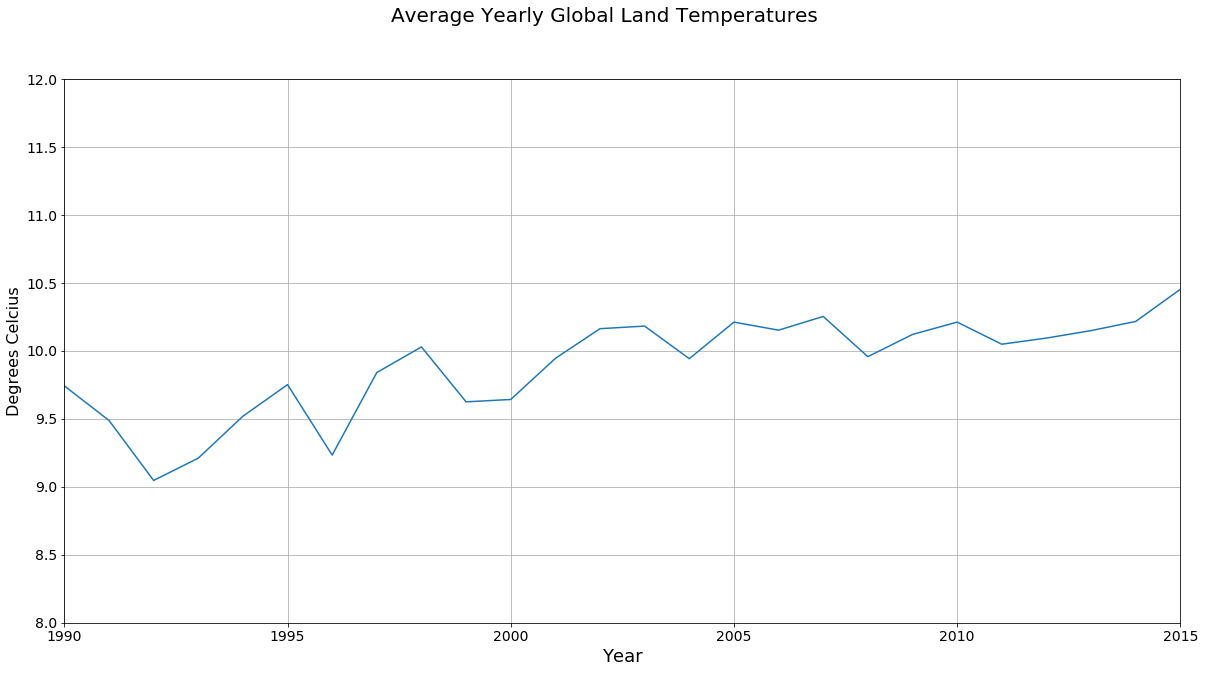

In [97]:
fig = plt.figure()
ax = grouped.plot('year', 'Pred ', figsize=(20,10), grid=True, ylim=(8,12), fontsize=14, legend=False)
plt.suptitle('Average Yearly Global Land Temperatures', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Degrees Celcius', fontsize=16)
plt.show()

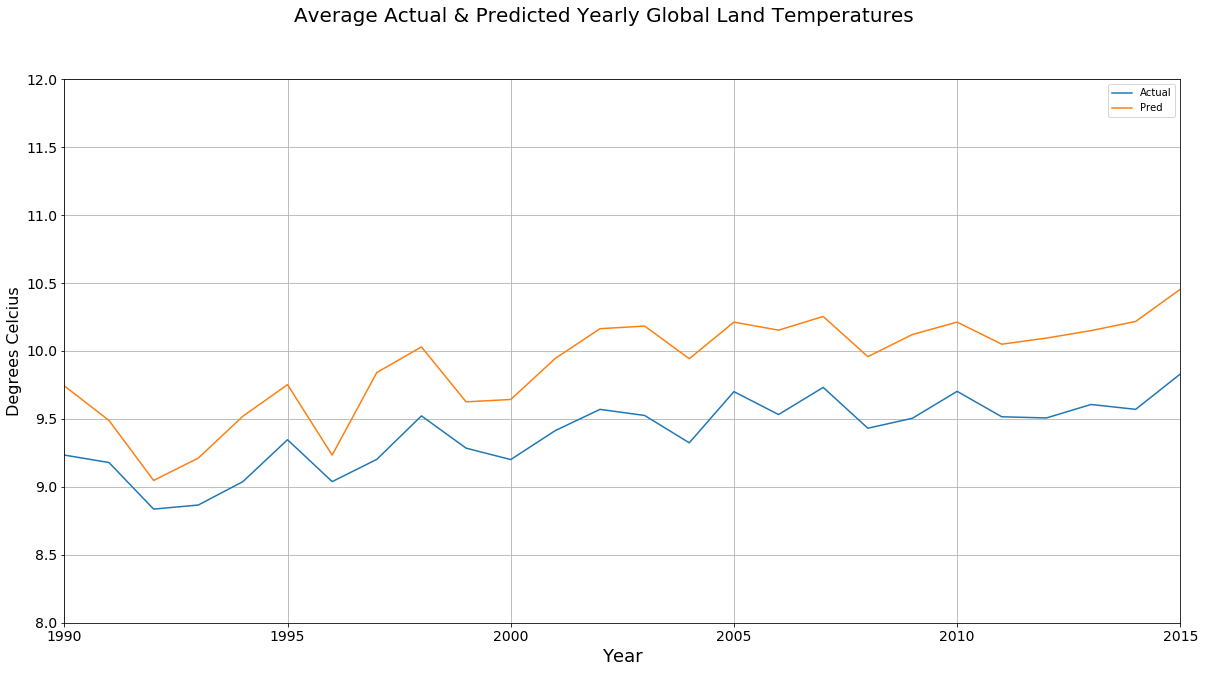

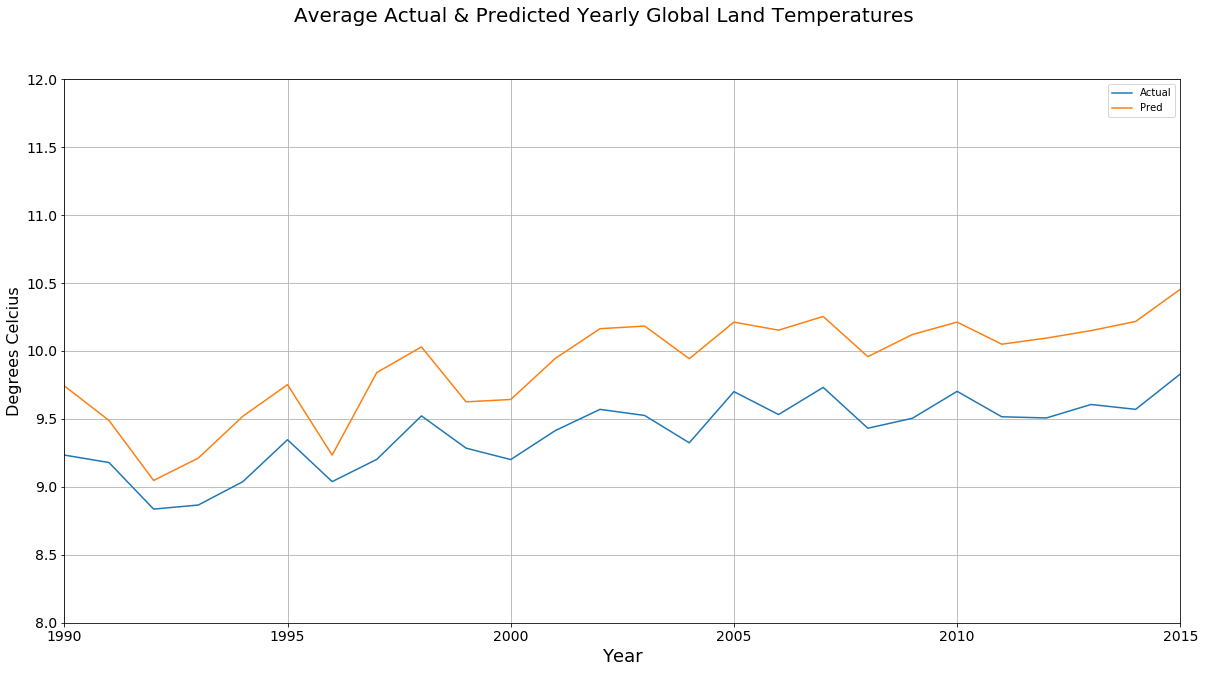

In [99]:
fig = plt.figure()
ax = grouped.plot('year',['Actual','Pred '],figsize=(20,10),grid=True,ylim=(8,12),fontsize=14,legend=True)
plt.suptitle('Average Actual & Predicted Yearly Global Land Temperatures', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Degrees Celcius', fontsize=16)
plt.show()